In [38]:
# File: linear_regression_one_varialbe
# Name: Ryan Kuo
# ----------------------------
# This file shows the fundamental concepts of 
# machine learing:
#   - loss function
#   - cost function
#   - linear regression
#.  - polynomial features
#   - training process

In [39]:
import matplotlib.pyplot as plt
import numpy as np

In [40]:
# This function computes the L2 loss which is 
# ----------------------------------------
# [sum of (hypothesis(x_i) - y_i)^2] / (2*m)
# where hypothesis(x_i) == theta1(x_i^3) + theta2(x_i^2) + theta3(x_i) + b
# ----------------------------------------
# theta1: float, the parameter of x_i^3
# theta2: float, the parameter of x_i^2
# theta3: float, the parameter of x_i
# b     : float, the parameter that controls the amount of line shift
# x     : list, containing 21 data points
# y     : list, containing 21 data points
# return: float, the sum over all L2 losses of data points

def cost_function(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])**2 for i in range(len(x)))/(2*len(x))

In [41]:
# Test for cost_function. You should see 0.14631688333333334
print(cost_function(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

0.14631688333333334


In [42]:
def dJ_dtheta1(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**3 for i in range(len(x)))/len(x)

In [43]:
# Test for dJ_dtheta1. You should see -0.040437
print(dJ_dtheta1(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.040437


In [44]:
def dJ_dtheta2(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i]**2 for i in range(len(x)))/len(x)

In [45]:
# Test for dJ_dtheta2. You should see -0.09252266666666666
print(dJ_dtheta2(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.09252266666666666


In [46]:
def dJ_dtheta3(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i])*x[i] for i in range(len(x)))/len(x)

In [47]:
# Test for dJ_dtheta3. You should see -0.21906
print(dJ_dtheta3(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.21906


In [48]:
def dJ_db(theta1, theta2, theta3, b, x, y):
    return sum( (theta1*x[i]**3+theta2*x[i]**2+theta3*x[i]+b-y[i]) for i in range(len(x)))/len(x)

In [49]:
# Test for dJ_db. You should see -0.5394666666666666
print(dJ_db(0.1, 0.2, 0.3, -0.5, [0.3, 0.4, 0.5], [0.1, 0.2, 0.3]))

-0.5394666666666666


In [50]:
# ---------- DO NOT EDIT THE CODE BELOW THIS LINE ---------- #

In [51]:
x = [6.1101,5.5277,8.5186,7.0032,5.8598,8.3829,7.4764,8.5781,6.4862,5.0546,5.7107,10.164,5.734,8.4084,5.6407,5.3794,6.3654,5.1301,6.4296,7.0708,6.1891]

In [52]:
y = [6.592,9.1302,13.662,11.854,6.8233,11.886,4.3483,12,6.5987,3.8166,3.2522,15.505,3.1551,7.2258,0.71618,3.5129,5.3048,0.56077,3.6518,5.3893,3.1386]

In [53]:
# ---------- Showing your data ---------- #

(0.0, 30.0)

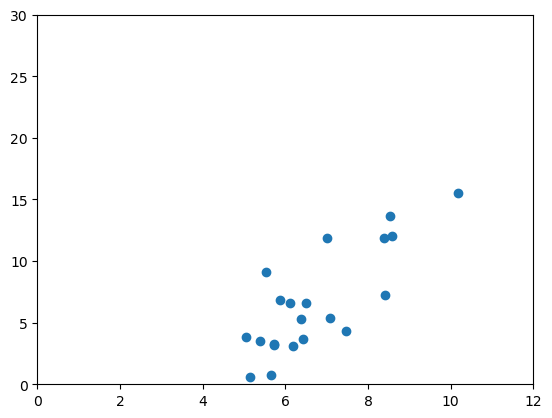

In [54]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([0,12])
axes.set_ylim([0,30])

In [55]:
# Please perform feature scaling (normalization) by: 
# subtracting min(x) from each data point and dividing the result with (max(x)-min(x))
x = list((x[i]-min(x))/(max(x)-min(x)) for i in range(len(x)))
y = list((y[i]-min(y))/(max(y)-min(y)) for i in range(len(y)))

In [56]:
print(x[10])         # You should see 0.12841038086663803
print(y[10])         # You should see 0.18009827204211928

0.12841038086663803
0.18009827204211928


(0.0, 2.0)

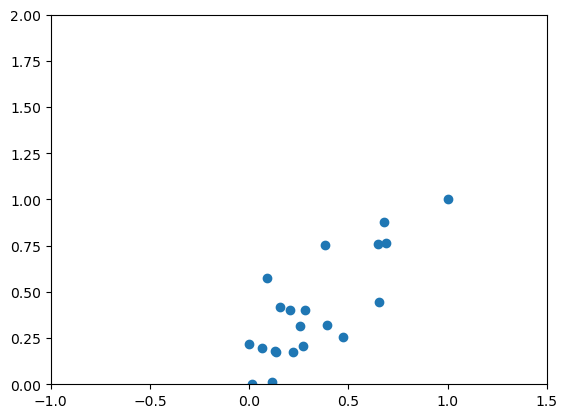

In [57]:
plt.scatter(x, y)
axes = plt.gca()
axes.set_xlim([-1,1.5])
axes.set_ylim([0,2])

In [58]:
# ------------ Initialize your theta ------------ #
# -----------  Choose from -1 to +1 ------------ #

In [59]:
theta1 = 0.2
theta2 = 0.2
theta3 = 0.2
b = 0.2

In [60]:
# ---------- Initialize your alpha ---------- #

In [61]:
# TODO: which value is appropriate for alpha?
# Try 0.001, 0.01, 0.1

In [62]:
alpha = 0.1

In [63]:
# ---------- Training process ---------- #
# ---- 50 iterations over all data ----- # 

In [64]:
# Remember to append updated theta1, theta2, theta3, b, and cost.

theta1_history = []
theta2_history = []
theta3_history = []
b_history = []
cost_history = []
for i in range(50):
    theta1_history.append(theta1)
    theta2_history.append(theta2)
    theta3_history.append(theta3)
    b_history.append(b)
    cost = cost_function(theta1, theta2, theta3, b, x, y)
    cost_history.append(cost)

    # G.D.
    theta1 -= alpha*dJ_dtheta1(theta1, theta2, theta3, b, x, y)
    theta2 -= alpha*dJ_dtheta2(theta1, theta2, theta3, b, x, y)
    theta3 -= alpha*dJ_dtheta3(theta1, theta2, theta3, b, x, y)
    b -= alpha*dJ_db(theta1, theta2, theta3, b, x, y)
    

In [65]:
# ---------- Cost changes during training process ---------- #

In [66]:
# Pay attention to the trend of cost. 
# Is is rising? If it is, why?

print(cost_history)

[0.020322267968528745, 0.019407401618029535, 0.018679727808768344, 0.018098893303055676, 0.01763331672870861, 0.017258278409974626, 0.016954426409792195, 0.016706608067202963, 0.016502956089262426, 0.01633417372097156, 0.016192975609563558, 0.016073650435970456, 0.015971718781241873, 0.015883665478550874, 0.015806730223662597, 0.015738743753193375, 0.01567799966556409, 0.015623154122307975, 0.0155731473587452, 0.015527142255750812, 0.01548447625877721, 0.015444623739290146, 0.01540716652647692, 0.015371770831916879, 0.01533816917691559, 0.015306146234897403, 0.015275527738000514, 0.015246171782197882, 0.015217962010112118, 0.015190802263994179, 0.015164612389965224, 0.015139324943954747, 0.01511488260400991, 0.01509123613608693, 0.015068342793638789, 0.015046165057293096, 0.015024669641244034, 0.01500382670889214, 0.014983609252717734, 0.01496399260312044, 0.014944954038587109, 0.014926472475524491, 0.014908528220770111, 0.014891102773458826, 0.014874178665791382, 0.014857739334499983,

In [67]:
# ---------------------------- Please do not modify codes below this line ---------------------------- #

theta1: 0.2, theta2: 0.2, theta3: 0.2, b: 0.2


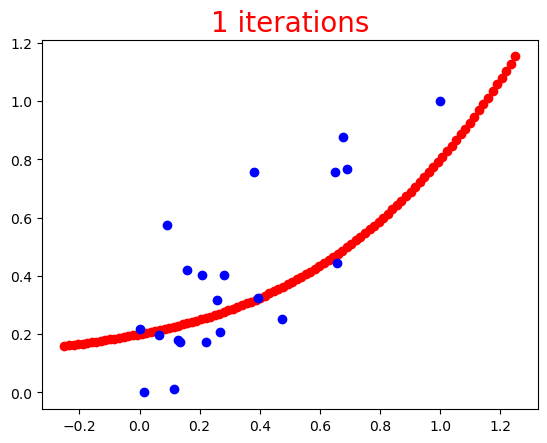

In [68]:
theta1 = theta1_history[0]
theta2 = theta2_history[0]
theta3 = theta3_history[0]
b = b_history[0]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("1 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.21631999579752148, theta2: 0.22180232177215228, theta3: 0.23125180738681803, b: 0.24107391128983627


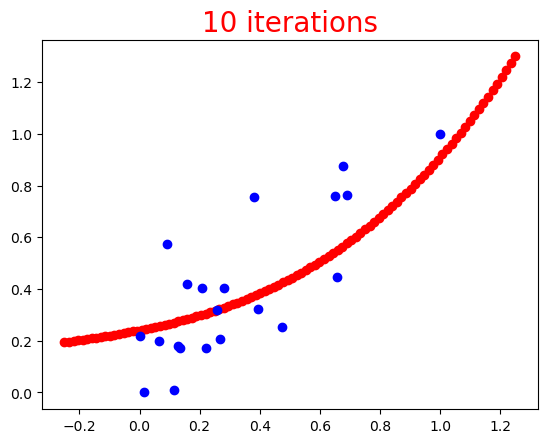

In [69]:
theta1 = theta1_history[9]
theta2 = theta2_history[9]
theta3 = theta3_history[9]
b = b_history[9]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("10 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.22702303035397106, theta2: 0.23614685474271896, theta3: 0.2504347343551508, b: 0.2502707753966434


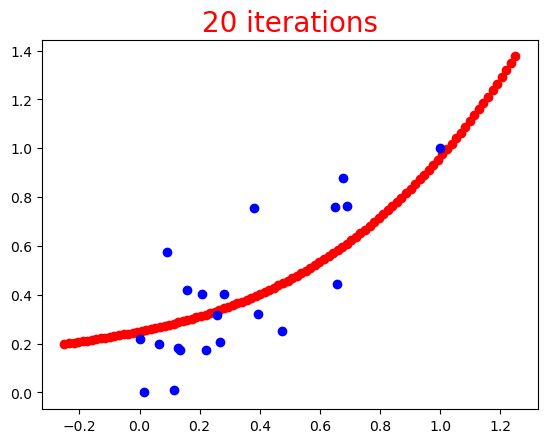

In [70]:
theta1 = theta1_history[19]
theta2 = theta2_history[19]
theta3 = theta3_history[19]
b = b_history[19]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("20 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

In [71]:
# ---------- Plot the errors over the training process ---------- #

theta1: 0.23439395136714625, theta2: 0.24628134259350962, theta3: 0.263614237449334, b: 0.24832872020832014


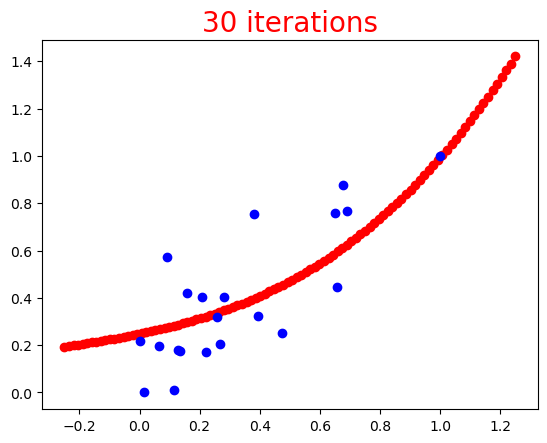

In [72]:
theta1 = theta1_history[29]
theta2 = theta2_history[29]
theta3 = theta3_history[29]
b = b_history[29]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("30 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

theta1: 0.23998199037991788, theta2: 0.25430249846250463, theta3: 0.2741937227192389, b: 0.24374318955000426


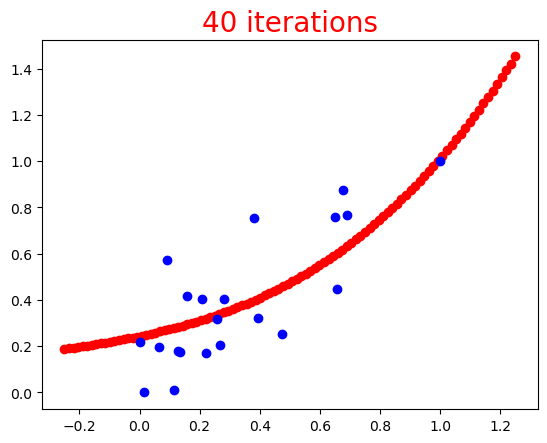

In [73]:
theta1 = theta1_history[39]
theta2 = theta2_history[39]
theta3 = theta3_history[39]
b = b_history[39]

print(f'theta1: {theta1}, theta2: {theta2}, theta3: {theta3}, b: {b}')

x_plot = np.linspace(-0.25, 1.25, 100)
y_plot = theta1*(x_plot**3)+theta2*(x_plot**2)+theta3*(x_plot)+b


plt.scatter(x_plot, y_plot, color='red')
plt.scatter(x, y, color='blue')


# show the plot
plt.title("40 iterations", color='red', fontdict = {'fontsize': 20})
plt.show()

Text(0.5, 1.0, 'Errors over iterations')

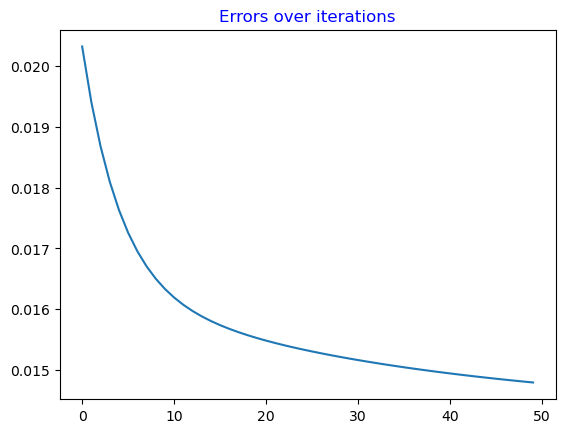

In [74]:
cost_x = list(range(len(cost_history)))
cost_y = cost_history
plt.plot(cost_x, cost_y)
plt.title("Errors over iterations", color = 'blue')